<a href="https://colab.research.google.com/github/hadighorbani74/smartman2022/blob/main/Cifa10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [2]:
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train = (X_train - X_train.min())/(X_train.max() - X_train.min())
X_test = (X_test - X_test.min())/(X_test.max() - X_test.min())

In [7]:
model = Sequential()
model.add(Conv2D(64,(3,3) , activation='relu', padding = 'same',input_shape = (X_train.shape[1] , X_train.shape[2] , X_train.shape[3])))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3) , activation ='relu',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [8]:
es = EarlyStopping(monitor = 'val_loss' , mode = 'auto' , patience = 25)
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [9]:
h = model.fit(X_train , y_train , epochs = 80 , batch_size = 64 , validation_split = 0.1 , callbacks = [es] , shuffle = True , verbose = 'auto')

704/704 [==============================] - 8s 12ms/step - loss: 0.4509 - accuracy: 0.8380 - val_loss: 0.6997 - val_accuracy: 0.7730
Epoch 79/80
704/704 [==============================] - 8s 12ms/step - loss: 0.4454 - accuracy: 0.8407 - val_loss: 0.7849 - val_accuracy: 0.7592
Epoch 80/80
704/704 [==============================] - 8s 12ms/step - loss: 0.4445 - accuracy: 0.8406 - val_loss: 0.7395 - val_accuracy: 0.7620


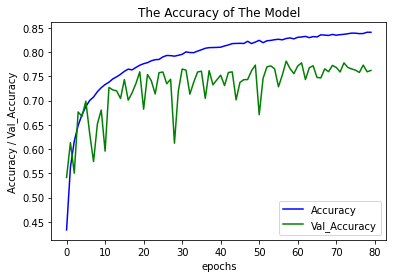

In [10]:
plt.plot(h.history['accuracy'] , label = 'Accuracy' , color = 'blue')
plt.plot(h.history['val_accuracy'] , label = 'Val_Accuracy' , color = 'green')
plt.title('The Accuracy of The Model')
plt.xlabel('epochs')
plt.ylabel('Accuracy / Val_Accuracy')
plt.legend()
plt.show()

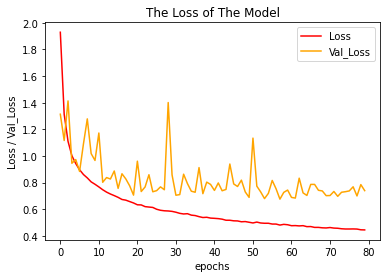

In [11]:
plt.plot(h.history['loss'] , label = 'Loss' , color = 'red')
plt.plot(h.history['val_loss'] , label = 'Val_Loss' , color = 'orange')
plt.title('The Loss of The Model')
plt.xlabel('epochs')
plt.ylabel('Loss / Val_Loss')
plt.legend()
plt.show()

In [12]:
score = model.evaluate(X_test , y_test , batch_size = 128)

79/79 [==============================] - 1s 8ms/step - loss: 0.7667 - accuracy: 0.7594


In [13]:
pred = model.predict(X_test)